<a href="https://colab.research.google.com/github/mrchapagain/SocialNetworkAnalytics/blob/main/TwiteerDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tweeter Data Analytics

***Here I will cover:***
1. *Tweets from twetter user*
2. *Tweets # search by keywords*

In [ ]:
#!pip install tweepy

***Libaries***

In [97]:
# Necessary libaries
from tweepy import OAuthHandler
from tweepy import API
import tweepy
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import time

***Tweepy authentication***

In [ ]:
# Load the data
from google.colab import files
uploaded= files.upload()
#Get the data

Saving config.ipynb to config.ipynb


In [98]:
#read configs, #import configparser, #config= configparser.ConfigParser(), #config.read('/content/sample_data/config.ipynb')
#Necessary information form tweet account
#Necessary information form tweet account
consumer_key='hYt37U1prLMj2LBfWaH3VfwAP'
consumer_secret='8sOKCBqlh0NLEByi3IjQ1mjlhTVhAtFzoOLqU9w5vn0qjmdAR1'
access_token='14970816-bxUWKHaeQvNpVP7nNzgOwWe2Sa3dsLAposBrhuhsg'
access_token_secret='nqioC9WEH7XFXpMU6KxmKuplZ4SIwmcgKAUzQYc1E2bXo'

auth = OAuthHandler(consumer_key, consumer_secret) # Consumer key authentication
auth.set_access_token(access_token, access_token_secret) # Access key authentication
api = API(auth)  # Set up the API with the authentication handler
username= api.me().screen_name  # just check if it is working
display (api, username)

'mrchapagain'

#1. Tweets from user

***Creating variable to navigate twetter by defining function***

In [75]:
# Obtaining tweet from specific user account
def tweets_by_user(user):
  limit=300

  tweets_obj= tweepy.Cursor(api.user_timeline, screen_name=user, count=200, tweet_mode="extended").items(limit)
  
  # Create Data Frame
  columns= ['Tweets', 'Likes', 'Time', 'User']
  tweets = []
  for i in tweets_obj:
    tweets.append([i.full_text, i.favorite_count, i.created_at, i.user.screen_name])

  df= pd.DataFrame(tweets, columns=columns)
  df['Time']=df['Time'].apply(lambda x: x.strftime('%Y-%m-%d'))
  return df
  

In [251]:
tweets_by_user("mrchapagain")

,Tweets,Likes,Time,User
0,Twitter Data Analytics app: http://159.65.89.1...,0,2022-10-14,mrchapagain
1,Global Business - Global Strategy http://t.co/...,2,2011-02-23,mrchapagain
2,Writing presentation for Final Report for Sout...,2,2008-06-01,mrchapagain


## Tweet trend by location

In [289]:
def tweets_trends(woeid_dict):
      df=pd.DataFrame()

      for country, woeid in woeid_dict.items():
        # fetching the trends
        trends= api.trends_place(id= woeid, exclude = "hashtags") #tweepy.Cursor(api.trends_available, id= woeid)
        df_list= []
        df1=pd.DataFrame()
        for value in trends:
          for trend in value['trends']:
            df_list.append(trend['name'])
        df1[country]= df_list
        df= pd.concat([df, df1[country]], axis = 1)
      return df
tweets_trends({"Denmark":23424796, "Sweden": 23424954, "UK":23424975, "USA" :2488042, "Ukraine":23424976, "Nepal": 2295412, "India":23424848})

,Denmark,Sweden,UK,USA,Ukraine,Nepal,India
0,Findsen,Tidöavtalet,Chancellor,Nicki,Starlink,Aye Zindagi In Cinemas,Aye Zindagi In Cinemas
1,FE-sagen,Johan Pehrson,Chancellor,Van Gogh,Elon,Jasprit Bumrah,Jasprit Bumrah
2,Trine Bramsen,Liberalerna,Van Gogh,Good Friday,Pentagon,INS Arihant,INS Arihant
3,Rotterdam,Ulf Kristersson,Jeremy Hunt,Lil Baby,Маск,Fingerprint Scanner,Fingerprint Scanner
4,Barbara Bertelsen,Karl Hedin,Watford,Pelosi,SpaceX,Bay of Bengal,Bay of Bengal
5,Xavi,Gamla Stan,Just Stop Oil,Jesus of Nazareth,Macron,'Shivling','Shivling'
6,Elon,Stockholms,Heinz,Finally Friday,Defenders,TUM MERE BY DARSHAN RAVAL,TUM MERE BY DARSHAN RAVAL
7,Alex Jones,Lomotey,National Gallery,Kwasi Kwarteng,Mykolaiv,I Am Sushant I Want Justice,I Am Sushant I Want Justice
8,Pique,Shinnimin,Zahawi,Daily Quordle 263,Los Angeles,Shardul Thakur,Shardul Thakur
9,Europa League,OSSE,U-turn,Happy Friyay,Armed Forces,EVMs,EVMs


***Enter the Tweeter user-Id and see the data***

In [4]:
df=tweets_by_user("DRNyheder")
#now lets make only tweets thats has not Re-Tweeted!
df_user_tweet= df[~df.Tweets.str.contains("RT")].set_index('Tweets')
df_user_tweet.head()

,Likes,Time,User
Tweets,,,
Ubrugt varmepulje: Vred minister i frontalangreb på 'sløve' kommuner https://t.co/Xf3gNdY8hk https://t.co/twGo2YRaai,2,2022-10-14,DRNyheder
Kongresudvalg advarer om risikoen for et nyt angreb på demokratiet: Nu vil de have Trump afhørt https://t.co/beEWXK7d5g https://t.co/1bE6dTerov,16,2022-10-14,DRNyheder
Journalistforbund raser over påstået forsøg på at få Findsen til at udlevere kilder https://t.co/0kGBK88ulC https://t.co/Md7iCDUtMU,4,2022-10-14,DRNyheder
Pressede pædagoger og besparelser gør forældre utrygge: 'Bliver Victor set? Bliver Victor set nok?' https://t.co/A0idqxLweV https://t.co/ag7QWQvk4i,3,2022-10-14,DRNyheder
Uden internet og i hemmelighed skrev journalist Findsen-bog: Sådan faktatjekkede hun spionchef https://t.co/nFih9Fy2QL https://t.co/53t1XkNYEo,13,2022-10-13,DRNyheder


In [ ]:
# Top most liked tweets
mostlike= df_user_tweet.loc[df_user_tweet.Likes.nlargest(10).index]
mostlike.head()

,Likes,Time,User
Tweets,,,
Støttepartier tøver med at lade uvildige advokater vurdere minkrapport: 'Kan bedst betegnes som hykleri' https://t.co/Ry9EjxqRvm https://t.co/JAB32AD4Zn,90,2022-06-29,DRNyheder
Radikalt bagland presser partitop: Advokater skal vurdere om Mette Frederiksen skal for rigsret https://t.co/EUBhvTgKE1 https://t.co/2NjjCvg8YA,72,2022-07-01,DRNyheder
"Inflationen brager løs - og Danmark er blandt de europæiske lande, der hjælper befolkningen mindst https://t.co/KOByf8Xc7k https://t.co/WzASaWeGfX",62,2022-06-19,DRNyheder
Uffe Ellemann-Jensen er død https://t.co/X7ddZjEuiR https://t.co/q7RDaXhT1W,54,2022-06-19,DRNyheder
Seneste nyt fra Ukraine: Zelenskyj vil have Rusland ud af FN's Sikkerhedsråd https://t.co/rgKyeBaJIk https://t.co/mjdnFSXxji,51,2022-06-29,DRNyheder


***Plot the word-colud***

In [ ]:
#Plot the word cloud
def wordcloud_plot(df_col):
  from wordcloud import WordCloud 
  allWords= ' '.join( [twts for twts in df_col] )
  wordCloud = WordCloud(width= 1000, height=500, random_state=21, max_font_size= 119).generate(allWords)
  plt.figure(figsize=(15,10))
  plt.imshow(wordCloud, interpolation = "bilinear")
  plt.axis('off')
  plt.show()

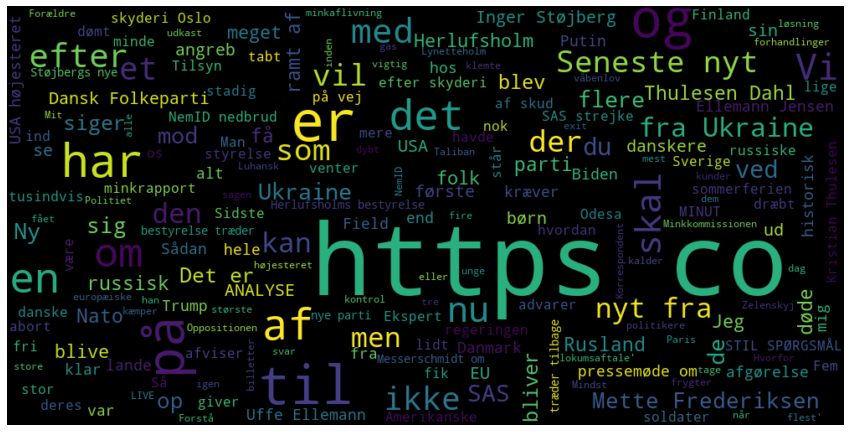

In [ ]:
wordcloud_plot(df['Tweets'])

***Sentiment Analysis***

In [ ]:
# Create a function to compute Negetive, Neutral and Positive analysis
import re
from textblob import TextBlob
def SentimentAnalysis(df):
  # first clean the text
  text= df['Tweets']

  def cleanText(text):
    text= re.sub(r'@[A-Za-z0-9]+', '',text) # Removed @mentions
    text= re.sub(r'#', '',text) # the '#' symbol
    text= re.sub(r':', '',text) # the ':' symbol
    text= re.sub(r'RT[\s]+', '',text) # Removed RT
    text= re.sub(r'https?:\/\/\s+', '',text) # Removed the hyper link
    return text

  #clean tweets
  df['Tweets']= df['Tweets'].apply(cleanText)

  #function to get the subjectivity
  def getSubjectivity(text=df['Tweets']):
    return TextBlob(text).sentiment.subjectivity
  #function to ge the polarity
  def getPolarity(text=df['Tweets']):
    return TextBlob(text).sentiment.polarity
  #Create to new columns
  df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
  df['Polarity']= df['Tweets'].apply(getPolarity)

  # Function to sentiment
  def getAnalysis(score):
    if score < 0: return 'Negetive'
    elif score == 0: return 'Neutral'
    else: return 'Positive'

  df['Analysis']= df['Polarity'].apply(getAnalysis)
  #show the data

  return df

In [ ]:
df_sentiment=SentimentAnalysis(df).set_index("Tweets")
df_sentiment[['Likes', 'Time', 'Analysis']].head()

,Likes,Time,Analysis
Tweets,,,
Flere personer er ramt af skud i Field's på Amager https//t.co/RnRnEULF4V https//t.co/LlmrQmIBQC,3,2022-07-03,Neutral
Anmeldelse om skyderi ved shoppingcenteret Field's https//t.co/7hlTyG2Kjs https//t.co/dcZqK8uQnk,7,2022-07-03,Neutral
"Seneste nyt fra Ukraine Rusland siger, de har kontrol med hele Luhansk-regionen https//t.co/YgM51Q6o29 https//t.co/FwSoRi14iJ",3,2022-07-03,Neutral
ANALYSE To Mitch McConnell-tacklinger har banet vejen for USA's mest konservative højesteret https//t.co/D1lLUNB3ub https//t.co/ABqsZxGlNR,4,2022-07-03,Neutral
Rusland har fået kontrol over strategisk vigtig by 'Russerne har opnået et delmål' https//t.co/6lHNIJaTmJ https//t.co/K1dQu9uuiy,2,2022-07-03,Neutral


***Plotting the Analytics***

In [ ]:
# Plot and visualize the counts
def sentiment_plot(df):
  plt.title('Sentiment Analysis of tweets')
  plt.xlabel('Sentiment')
  plt.ylabel('Counts')
  df['Analysis'].value_counts().plot(kind='bar')
  plt.show()


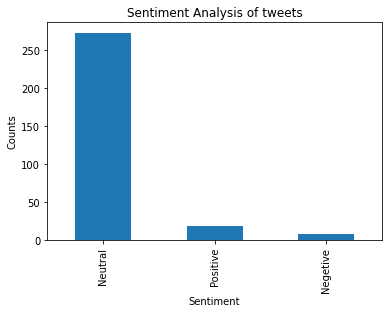

In [ ]:
sentiment_plot(df_sentiment)

#2.  Tweets search by using Keywords or Hashtag

***Define function to scrap tweet by keywords***

In [ ]:
# Obtaining tweet using keywords or Hastag
def tweets_by_keywords(keywords):
  limit=300

  tweets_obj= tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode="extended").items(limit)
    # Create Data Frame
  columns= ['Tweets', 'Time', 'User']
  tweets = []
  for i in tweets_obj:
    tweets.append([i.full_text, i.created_at, i.user.screen_name])

  df= pd.DataFrame(tweets, columns=columns)
  df['Time']=df['Time'].apply(lambda x: x.strftime('%Y-%m-%d'))
  return df


***Get the data by typing keywords and look Sentiment Analytics***

In [ ]:
keywords=input('Type the word you want to search tweet by: ')
df_keywords= tweets_by_keywords(keywords)
SentimentAnalysis(df_keywords)[['Tweets',	'Time',	'User','Analysis']].set_index('Tweets').head()

Type the word you want to search tweet by: Health


,Time,User,Analysis
Tweets,,,
"The Ohio law does make an exception for the mother's health, so I don't see why she didn't qualify. There is probably much more to the story than what we read in this piece, which is 10% fact and 90% politics. Like most things these days.",2022-07-03,galaxy999ca,Positive
"_Oilllll Like I said, mental health, physical health, permanent bodily damages, financial issues, possible homelessness, and more I cannot think of immediately. These can all end up in the loss of life of the person carrying the pregnancy. Its not a simple issue.",2022-07-03,kway_chan,Positive
"""Women must be able to make their own health care decisions."" -Sen. Raphael Warnock\n\nUpbringing &amp; experience w a cong…",2022-07-03,CherylBlueWave,Positive
_2 Why doesn't sign an executive order to declare a national emergency and use federal lands for abortions? Forcing…,2022-07-03,JaxHarley5,Neutral
Y'all pls pray for Ahmed's health.,2022-07-03,ihirarafique,Neutral


***Disply word-cloud***

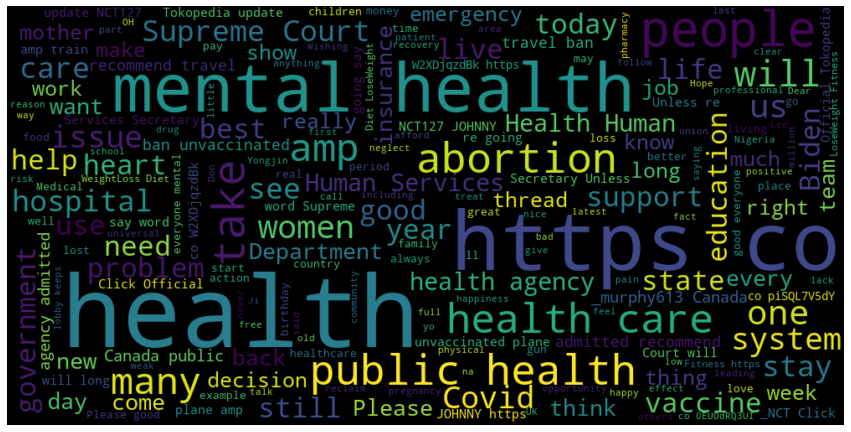

In [ ]:
wordcloud_plot(df_keywords['Tweets'])

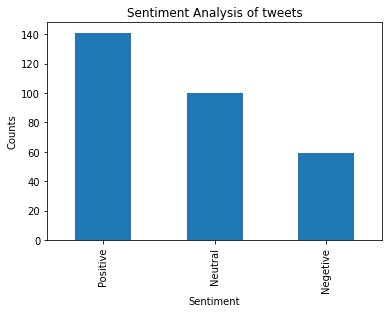

In [ ]:
sentiment_plot(df_keywords)

# Visualization with text processing

In [ ]:
# Libaries for sentiment analytics (NLP)
import matplotlib.pyplot as plt
import re
import spacy
import seaborn as sns

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# Split all the sentances and creat the list of sentence of from the tweet columns
list_of_sentences = [sentence for sentence in df.Tweets]

lines = []
for sentence in list_of_sentences:
  words = sentence.split()
  for w in words:
    lines.append(w)
print(lines[:20])

['Flere', 'personer', 'er', 'ramt', 'af', 'skud', 'i', "Field's", 'på', 'Amager', 'https//t.co/RnRnEULF4V', 'https//t.co/LlmrQmIBQC', 'Anmeldelse', 'om', 'skyderi', 'ved', 'shoppingcenteret', "Field's", 'https//t.co/7hlTyG2Kjs', 'https//t.co/dcZqK8uQnk']


In [ ]:
# Removing Punctuation by using Regular Expression (RegEx)
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2= []

for word in lines:
  if word != '':
    lines2.append(word)

In [ ]:
# Stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem= []
for word in lines2:
  stem.append(s_stemmer.stem(word))

In [ ]:
# Removing all the stop words
stem2= []

for word in stem:
  if word not in nlp.Defaults.stop_words:
    stem2.append(word)

In [ ]:
df2 = pd.DataFrame(stem2)
df2 = df2[0].value_counts()
df2.head()

er     78
og     65
til    64
p      63
af     50
Name: 0, dtype: int64

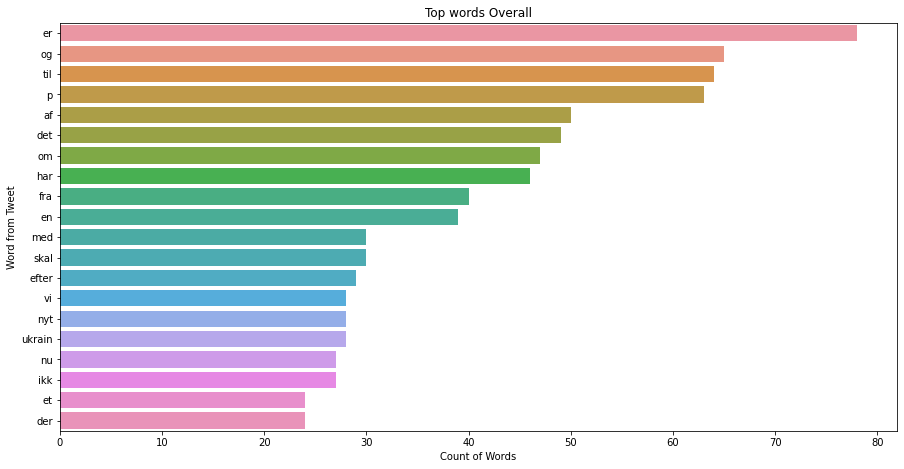

In [ ]:
# Visualization
df2= df2[:20,]
plt.figure(figsize=(15,7.5))
sns.barplot(df2.values, df2.index, alpha=1)
plt.title('Top words Overall')
plt.ylabel('Word from Tweet')
plt.xlabel('Count of Words')
plt.show()

In [ ]:
# Visualization for mentions organizations
def show_ents(doc):
  if doc.ents:
    for ent in doc.ents:
      print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [ ]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])
df7 = df6.where(df6['Entity'] == 'ORG')
df7 = df7['Word'].value_counts()

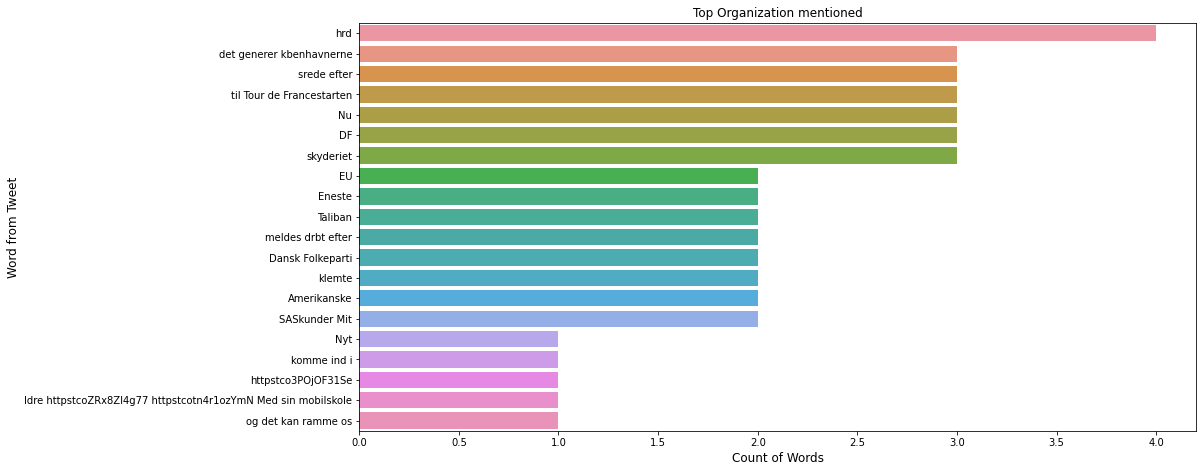

In [ ]:
# Visualization again
dfx= df7[:20, ]
plt.figure(figsize=(15,7.5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top Organization mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [ ]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])
df7 = df6.where(df6['Entity'] == 'PERSON')
df7 = df7['Word'].value_counts()

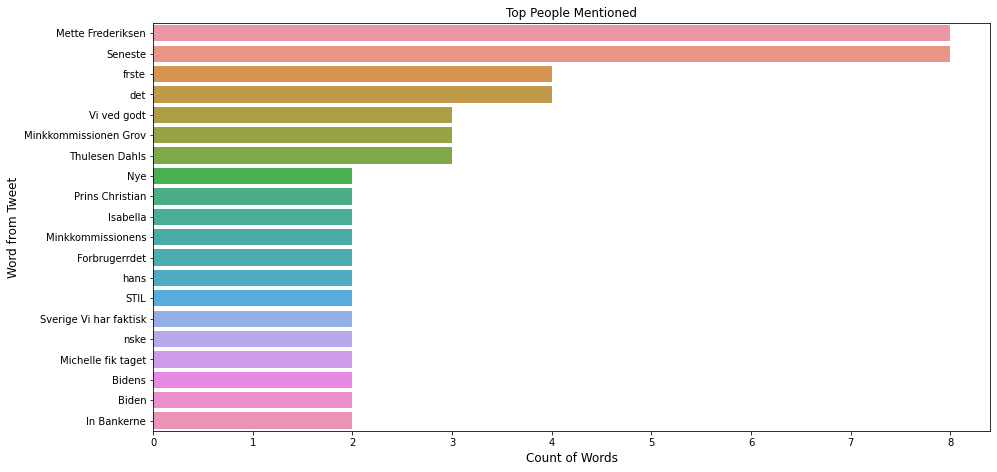

In [ ]:
# Visualization again
dfx= df7[:20, ]
plt.figure(figsize=(15,7.5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()